## People Analytics Project: 

### Background/Introduction:

Attrition/Churn/Turnover Rate refers to the rate at which employees leave a company. Employee turnover is a costly problem for organizations. The cost of replacing an employee can be quite large, and a study found that companies typically pay about one-fifth of an employee's salary to replace them. 

The cost can significantly increase if executives or highest-paid employees are to be replaced. The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

### What is HR/People/Talent/Workforce Analytics ?

HR/People/Talent/Workforce Analytics is the process of using data to make strategic decisions about an organization's workforce. It involves collecting, analyzing, and interpreting data from various sources such as HR systems, employee surveys, and performance metrics to gain insights into trends, patterns, and opportunities for improvement.

### Problem Statement:

To understand why and when employees are most likely to leave an oroganisation. This can help structure the actions to improve employee retention as well as possibly planning new hiring in advance. We will attempt to address the problem statement using the below questions:

1. What is the likelihood of an active employee leaving the company?
2. What are the key indicators of an employee leaving the company?
3. What policies or strategies can be adopted based on the results to improve employee retention?
   
Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (likely to stay), 1 (likely to leave). In this study, our target variable Y is the probability of an employee leaving the company.

### Project Structure:

 - Data Exploration:

 - Exploratory Data Analysis (EDA):(To View distribtion, summary, skewness and visualisation) 

 - Data Preprocessing: (Scaling and Encoding)

 - Feature Selection using A/B Testing: (ANOVA and Chi-Square)

 - Model Training and Development:

 - Logging metrics, parameters and model artificats using Databricks Mlflow for reproducibility.  

 - Model Evaluation using Classification Report & Confusion matrix 

 - Model Explainabity using SHAP Values: 

 - Best Model, Conclusion and Further Recommendations:  

### Data Exploration:

In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.

### Dataset Source:

The IBM HR Analytics Employee Attrition & Performance dataset is used for this project. It can be found at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Importing Libraries/Modules

We will import all the required libraries and modules required for our project as follows:

In [0]:
#importing libraries for data handling and analysis
import pandas as pd
import numpy as np

#importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px

#importing warnings to avoid any future warnings
import warnings 

In [0]:
%fs ls /FileStore/tables/


path,name,size,modificationTime
dbfs:/FileStore/tables/Credit_Card_Fraud_Detection_System_3.ipynb,Credit_Card_Fraud_Detection_System_3.ipynb,958387,1748492462000
dbfs:/FileStore/tables/Ecommerce_Walmart_Customer_Segmentation_with_MLflow-1.ipynb,Ecommerce_Walmart_Customer_Segmentation_with_MLflow-1.ipynb,1391945,1748409918000
dbfs:/FileStore/tables/Ecommerce_Walmart_Customer_Segmentation_with_MLflow.ipynb,Ecommerce_Walmart_Customer_Segmentation_with_MLflow.ipynb,1391945,1748409762000
dbfs:/FileStore/tables/Employee_Attrition_data/,Employee_Attrition_data/,0,0
dbfs:/FileStore/tables/HR_Employee_Attrition.csv,HR_Employee_Attrition.csv,227977,1748735797000
dbfs:/FileStore/tables/WA_Fn_UseC__HR_Employee_Attrition-1.csv,WA_Fn_UseC__HR_Employee_Attrition-1.csv,227977,1748735373000
dbfs:/FileStore/tables/WA_Fn_UseC__HR_Employee_Attrition.csv,WA_Fn_UseC__HR_Employee_Attrition.csv,227977,1748729610000
dbfs:/FileStore/tables/Walmart_customer_purchases.csv,Walmart_customer_purchases.csv,5680977,1748409213000


### Data Importing:

Let us import the dataset using spark to know what the data contains.

 Spark is an open-source, distributed big data processing framework designed for fast computation and scalable analytics.

In [0]:
df = spark.read.csv("/FileStore/tables/HR_Employee_Attrition.csv", header=True, inferSchema=True)



In [0]:
# Count rows
num_rows = df.count()

# Count columns
num_cols = len(df.columns)

print(f"Total Rows: {num_rows}")
print(f"Total Columns: {num_cols}")


Total Rows: 1470
Total Columns: 35


#### Exploratory Data Analysis: 

The Dataset has 1470 records and 35 fields. Lets explore further and see their data types and uniformity. 

In [0]:
display(df) 

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [0]:
df.printSchema()


root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

The Dataset has mix of integer and string types. 

In PySpark, the printSchema() function is used to display the schema (i.e., structure) of a DataFrame in a tree format, showing column names, data types, and nullability. 

In [0]:
from pyspark.sql.functions import col, sum as _sum

null_counts = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
# Convert to two-column format
transposed = (
    null_counts
    .toPandas()
    .T.reset_index()
    .rename(columns={"index": "Column", 0: "Null_Count"})
    .sort_values(by="Null_Count", ascending=False)
)

display(transposed)


Column,Null_Count
Age,0
StandardHours,0
NumCompaniesWorked,0
Over18,0
OverTime,0
PercentSalaryHike,0
PerformanceRating,0
RelationshipSatisfaction,0
StockOptionLevel,0
MonthlyIncome,0


In [0]:
df.select([c for c, t in df.dtypes if t in ('int', 'double', 'float')]).describe().display()


summary,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
mean,36.923809523809524,802.4857142857143,9.19251700680272,2.912925170068027,1.0,1024.865306122449,2.721768707482993,65.89115646258503,2.7299319727891156,2.0639455782312925,2.7285714285714286,6502.931292517007,14313.103401360544,2.6931972789115646,15.209523809523809,3.1537414965986397,2.7122448979591836,80.0,0.7938775510204081,11.279591836734694,2.7993197278911564,2.7612244897959184,7.0081632653061225,4.229251700680272,2.1877551020408164,4.12312925170068
stddev,9.135373489136729,403.50909994352804,8.10686443566608,1.0241649445978718,0.0,602.0243348474752,1.0930822146350003,20.329427593996176,0.7115611429632297,1.1069398989351202,1.1028461230547213,4707.956783097992,7117.786044059972,2.4980090060707463,3.6599377165396385,0.36082352460434397,1.0812088864403517,0.0,0.8520766679308381,7.780781675514995,1.2892706207958466,0.7064758297141507,6.126525152403571,3.623137034670627,3.2224302791379693,3.5681361205404363
min,18,102,1,1,1,1,1,30,1,1,1,1009,2094,0,11,3,1,80,0,0,0,1,0,0,0,0
max,60,1499,29,5,1,2068,4,100,4,5,4,19999,26999,9,25,4,4,80,3,40,6,4,40,18,15,17


##### Key Observations and Insights:

Mean and standard deviation (stddev) help us assess whether the data is centered or skewed. Useful for guiding normalization and standardization, ensuring all variables operate on a consistent scale for modeling.

- Age (18–60) Indicates presence of both young entrants and senior professionals.

Key Questions to ask: 
Are younger employees more likely to leave (attrition)?
Are older employees concentrated in specific departments?

- For DailyRate there is High Variation with Mean of 802 and Stdde of 403 → ~50% of mean, indicating wide income disparity.

Can do Equity analysis, Pay gap investigations and Outlier detection for unfair compensation patterns.

- For NumCompaniesWorked data shows Wide Experience Spread with Range: 0–9 and Stddev: 2.5 , indicating some freshers, and others highly experienced.

Investigation Area:
Do employees with more job switches tend to leave more?
Are these individuals harder to retain?

- For Promotion Variables , Some employees have 15+ years without promotion and No Promotions given for employees  in 3–4 Year Tenure Group, 25% of employees with 3–4 years tenure have had no promotions.

Investigation Points:
Is this group showing higher attrition?
Are systemic issues delaying promotions (e.g., unclear paths, manager bias)? 

Investigation Area:
Which departments/roles face long-term stagnation?
Is lack of advancement contributing to attrition?

- For StockOptionLevel: Stats show Mean of 0.79 & Stddev of 0.85 with most employees receive none or low options.

Key Considerations:
Relationship between stock options and employee motivation/retention
Departmental or role-based disparities in distribution

- For DistanceFromHome, Max value is 29 km, Mean of 9.2 km and Stddev of 8.1 km.

Key Questions:
Are those with longer commutes more likely to leave?
Could flexible/hybrid options reduce attrition risk? 

- For TrainingtimesLastYear,  It indicates that standard deviation does not vary much from mean and some employyes are either no receiving them at all. 

To validate the insights derived from our structured summary, we will use frequency plots to compare feature distributions against employee attrition status (Attrition vs. No Attrition). We will also perform Chi-Square tests for categorical variables and ANOVA tests for continuous variables to statistically evaluate the association between each feature and attrition. 

These analyses will help us identify significant patterns that may impact our model’s performance and guide us in determining whether changes in HR policies are necessary to improve employee retention. 


In [0]:

df.groupBy("Department", "JobSatisfaction").count().show()


+--------------------+---------------+-----+
|          Department|JobSatisfaction|count|
+--------------------+---------------+-----+
|     Human Resources|              3|   15|
|Research & Develo...|              1|  192|
|     Human Resources|              2|   20|
|               Sales|              4|  147|
|               Sales|              3|  127|
|     Human Resources|              4|   17|
|               Sales|              1|   86|
|Research & Develo...|              4|  295|
|Research & Develo...|              3|  300|
|               Sales|              2|   86|
|Research & Develo...|              2|  174|
|     Human Resources|              1|   11|
+--------------------+---------------+-----+



Data indicates that employees in Research & Development, Sales, and Human Resources departments predominantly fall into low satisfaction levels (1 and 2), while other departments lean toward higher satisfaction levels (3 and 4).

A total of 570 employees (39%) report low to moderate satisfaction, which is a substantial segment that may influence attrition, productivity, and employee engagement.

To assess whether department is significantly associated with attrition, we will perform a Chi-Square test of independence


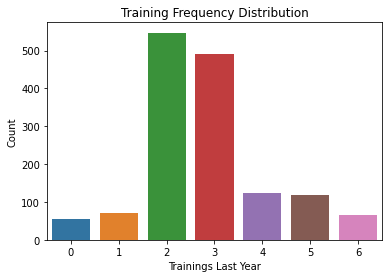

+---------------------+---------+-----+
|TrainingTimesLastYear|Attrition|count|
+---------------------+---------+-----+
|                    0|       No|   39|
|                    0|      Yes|   15|
|                    1|       No|   62|
|                    1|      Yes|    9|
|                    2|       No|  449|
|                    2|      Yes|   98|
|                    3|      Yes|   69|
|                    3|       No|  422|
|                    4|       No|   97|
|                    4|      Yes|   26|
|                    5|       No|  105|
|                    5|      Yes|   14|
|                    6|       No|   59|
|                    6|      Yes|    6|
+---------------------+---------+-----+



In [0]:
import seaborn as sns
sns.countplot(x="TrainingTimesLastYear", data=df.toPandas())
plt.title("Training Frequency Distribution")
plt.xlabel("Trainings Last Year")
plt.ylabel("Count")
plt.show()

df.groupBy("TrainingTimesLastYear", "Attrition").count().orderBy("TrainingTimesLastYear").show()



Most employees receive 2–3 trainings per year, but a notable portion receive none or many.
Strategically valuable for HR to monitor who gets how much training and why.

**Performing ANOVA- Test to check stastistical significance between all numerical variables and target categorical variables Attrition.**

In [0]:
from scipy.stats import f_oneway

# Select numeric columns and convert to Pandas
num_cols = [c for c, t in df.dtypes if t in ('int', 'double', 'float')]
pdf = df.select(['Attrition'] + num_cols).toPandas()

# Run ANOVA in one loop
anova = [(c, *f_oneway(*[g[c].dropna() for _, g in pdf.groupby('Attrition') if len(g) > 1]))
         for c in num_cols]

# Display sorted results
import pandas as pd
anova_df = pd.DataFrame(anova, columns=['Column', 'pValue', 'F_Stat']).sort_values(by='pValue')
spark.createDataFrame(anova_df).show(truncate=False)

/databricks/python/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
/databricks/python/lib/python3.9/site-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


+------------------------+--------------------+---------------------+
|Column                  |pValue              |F_Stat               |
+------------------------+--------------------+---------------------+
|PerformanceRating       |0.012250395534223307|0.9118840421067758   |
|HourlyRate              |0.06879597773678614 |0.7931347689944519   |
|EmployeeNumber          |0.1642553750949558  |0.685327589729904    |
|PercentSalaryHike       |0.266728168623382   |0.6056128238894396   |
|MonthlyRate             |0.3379164577081446  |0.5611235982243229   |
|Education               |1.4463081305523098  |0.2293152033222874   |
|YearsSinceLastPromotion |1.6022184053056754  |0.2057899591624541   |
|NumCompaniesWorked      |2.78228670165566    |0.09552526205649159  |
|RelationshipSatisfaction|3.0955763595800705  |0.07871363048465917  |
|DailyRate               |4.726639837649271   |0.02985816066026101  |
|TrainingTimesLastYear   |5.211646072556778   |0.02257849973719727  |
|WorkLifeBalance    

The Above table identifies which features show significant differences in means between employees who stayed vs those who left (i.e., predictive features for attrition). 

Most Significant Variables (p < 0.05):
BusinessTravel_idx and PerformanceRating

Worth Watching (borderline):
HourlyRate, Department_idx and DistanceFromHome (though surprising, may still be useful in non-parametric models). 

Employees from Sales, R&D, and HR are showing higher attrition, likely driven by factors such as frequent business travel, low performance ratings, lack of promotions, hourly rate disparities, and greater distance from home.

Other variables show high p-values and low F-statistics, indicating limited impact on attrition.

We'll focus on these key features and create visualizations (correlation heatmaps, boxplots, scatterplots) to explore their relationships and support further modeling.

In [0]:
from pyspark.sql.functions import col, trim, length, when, sum as _sum

# Count only empty or whitespace-only strings (excluding nulls)
empty_whitespace_counts = df.select([
    _sum(
        when(
            (col(c).isNotNull()) & ((trim(col(c)) == "") | (length(trim(col(c))) == 0)),
            1
        ).otherwise(0)
    ).alias(c) for c in df.columns
])

# Convert to tabular format
result = (
    empty_whitespace_counts
    .toPandas()
    .T.reset_index()
    .rename(columns={"index": "Column", 0: "Empty_Or_Whitespace_Count"})
    .sort_values(by="Empty_Or_Whitespace_Count", ascending=False)
)

display(result)


Column,Empty_Or_Whitespace_Count
Age,0
StandardHours,0
NumCompaniesWorked,0
Over18,0
OverTime,0
PercentSalaryHike,0
PerformanceRating,0
RelationshipSatisfaction,0
StockOptionLevel,0
MonthlyIncome,0


It is important to check for empty strings, whitespaces, and special characters during data cleaning. 

Sometimes, numerical columns are mistakenly treated as strings due to the presence of such characters. These need to be identified and removed to correctly interpret the variable's meaning and assess its relationship with the target variable.

Cleaning this data ensures that important numerical features are not overlooked and can be effectively used in analysis and modeling.

#### Data Visualization Phase: 

*Lets Look at few patterns and trends from the dataset, data visualization helps us to easily interpret and analyse data. let's explore our dataset using Pyspark and Python's libraries for visualization like Matplotlib and seaborn.*  

#### DISTANCE FROM HOME VS ATTRITION: 

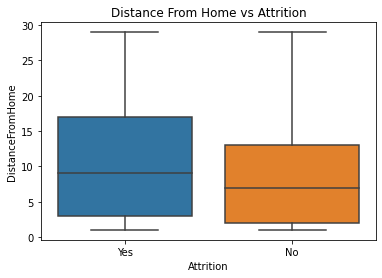

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas (only for relevant columns to save memory)
plot_df = df.select("Attrition", "DistanceFromHome").toPandas()

# Create the boxplot
sns.boxplot(x='Attrition', y='DistanceFromHome', data=plot_df)
plt.title('Distance From Home vs Attrition')
plt.show()


The plot suggests that while longer commutes may contribute to attrition, it is not a sole determinant, as many employees with long commutes have also stayed.

This insight supports including DistanceFromHome as a feature in our ML model, allowing the algorithm to learn its nuanced relationship with attrition.  

#### ATTRITION RATE BY DEPARTMENT AND BUSINESS TRAVEL

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely
Department                                                          
Human Resources           0.000000           0.363636       0.173913
Research & Development    0.082474           0.203297       0.129032
Sales                     0.085106           0.333333       0.190476


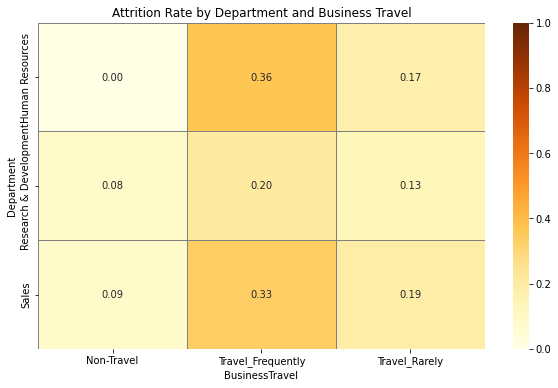

In [0]:
from pyspark.sql.functions import when, col, mean
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fix Attrition_Flag column if not already binary
df = df.withColumn("Attrition_Flag", when(col("Attrition") == "Yes", 1).otherwise(0))

# Step 2: Group and aggregate
bt_dept = df.groupBy("Department", "BusinessTravel") \
            .agg(mean("Attrition_Flag").alias("AttritionRate")) \
            .toPandas()

# Step 3: Inspect pivot table for debugging
pivot = bt_dept.pivot(index="Department", columns="BusinessTravel", values="AttritionRate")
print(pivot)

# Step 4: Plot with safe color scale
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrBr", vmin=0, vmax=1, linewidths=0.5, linecolor='gray')
plt.title("Attrition Rate by Department and Business Travel")
plt.show()






The plot suggests that high attrition with Frequent Travel shows below attrtion rate for different departments. 

**Human Resources:** Attrition rate is **36.4%** among employees who travel frequently.

**Sales:** Attrition rate is **33.3%** for frequent travelers.

**R&D:** Attrition rate is **20.3%** for frequent travelers.


**Business travel is positively associated with attrition:Employees required to travel more frequently are more likely to leave, especially in HR and Sales.**

**Travel frequency may be a stressor or dissatisfaction factor, particularly in roles that are not typically field-based.**

**Departments with high attrition for frequent travelers may need to reassess travel policies or improve support systems.** 

#### Average Years Since last Promotion by Job Roles 

Out[14]: <module 'matplotlib.pyplot' from '/databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py'>

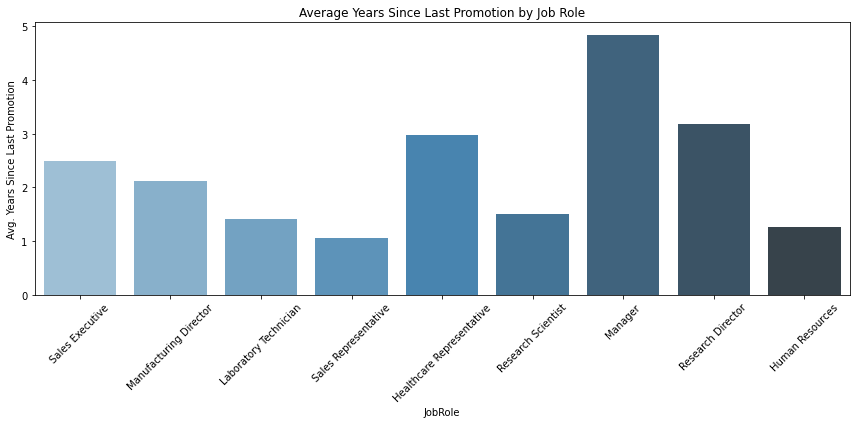

In [0]:
from pyspark.sql.functions import mean

# Aggregate in PySpark
promo_avg = df.groupBy("JobRole") \
              .agg(mean("YearsSinceLastPromotion").alias("AvgYears")) \
              .toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=promo_avg, x="JobRole", y="AvgYears", palette="Blues_d")
plt.title("Average Years Since Last Promotion by Job Role")
plt.xticks(rotation=45)
plt.ylabel("Avg. Years Since Last Promotion")
plt.tight_layout()
plt 


Managers **(5 years)** and Healthcare Representatives **(3 years)** have the highest average years since last promotion.

This may indicate stagnation or slower career progression in these roles.

Moderate Delay:

Research Directors, Sales Executives, and Manufacturing Directors have an average of **2.5 to 3.5 years** since last promotion.

#### Years Since Last Promotion by Job Level and Attrition:

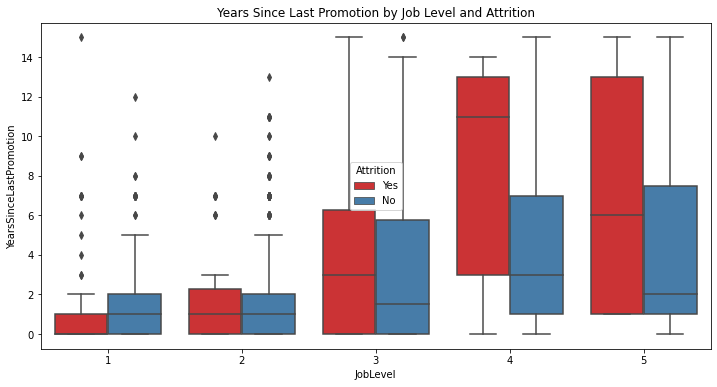

In [0]:
promo = df.select("YearsSinceLastPromotion", "JobLevel", "Attrition").toPandas()

plt.figure(figsize=(12, 6))
sns.boxplot(data=promo, x="JobLevel", y="YearsSinceLastPromotion", hue="Attrition", palette="Set1")
plt.title("Years Since Last Promotion by Job Level and Attrition")
plt.show()



**Job Levels 1–2 (Entry/Junior Roles):**

Most attrition cases (red) occur with very short times since last promotion (0–2 years).

Suggests these employees may leave early if growth expectations are unmet quickly.

**Job Levels 3–5 (Mid to Senior Roles):**

Employees who left (Attrition = Yes) have longer times without promotion, especially at Job Levels 4 and 5.

Attrition in senior roles is often linked to career stagnation, with some cases showing up to 14 years without promotion.

**Non-Attrition Cases (blue):**

These are more evenly distributed, often with lower or moderate promotion gaps.  

**YearsSinceLastPromotion** and its interaction with **JobLevel** should be considered as predictive features in your attrition model — they show a clear pattern of influence.  

> #### Job Role vs Performance Rating by Attrition 

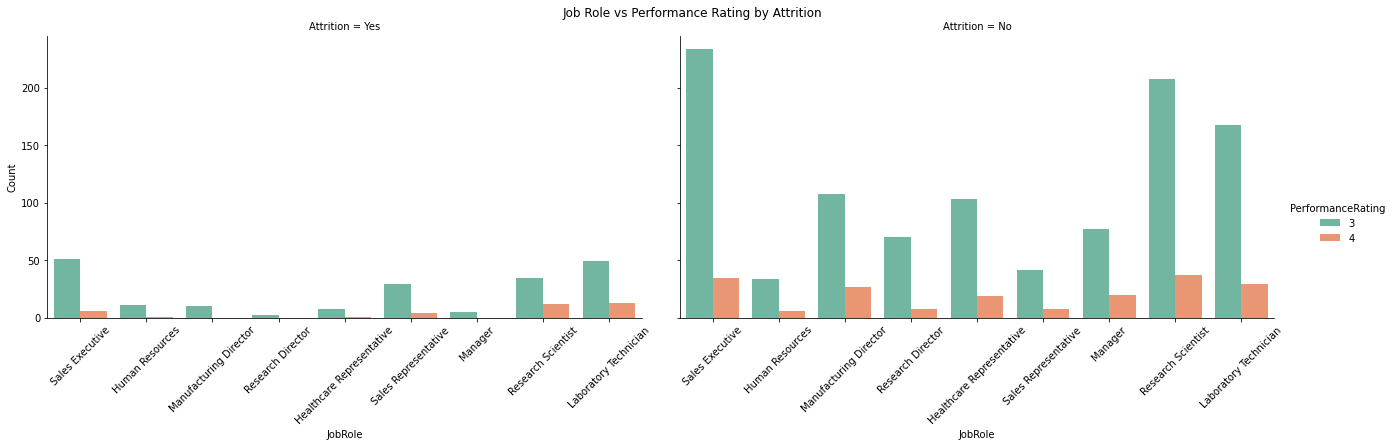

In [0]:
from pyspark.sql.functions import count
jp_perf = df.groupBy("JobRole", "PerformanceRating", "Attrition") \
            .agg(count("*").alias("Count")) \
            .toPandas()

g = sns.catplot(data=jp_perf, x="JobRole", y="Count", hue="PerformanceRating", col="Attrition",
                kind="bar", height=5, aspect=1.8, palette="Set2")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Job Role vs Performance Rating by Attrition")
plt.show()



- In the left panel (Attrition = Yes), most employees who left were rated as 3 across almost all job roles. This suggests that "average" performers may feel stuck or unrecognized, increasing attrition risk.

- Sales Executives, Lab Technicians, Research Scientists. These roles have the highest attrition counts among employees rated as 3.

Indicates possible dissatisfaction despite meeting expectations — possibly due to lack of promotions, rewards, or job stress.

** Investigate below:**

Add a statistical test (Chi-square) to measure the strength of association between JobRole, PerformanceRating, and Attrition.

Consider building interaction terms in the ML model (e.g., PerformanceRating × JobRole).

#### Hourly Rate by Job Role and Attrition: 

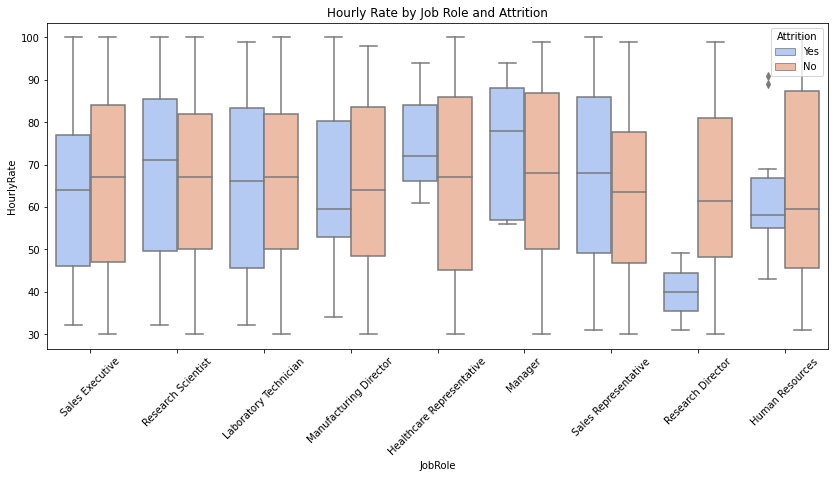

In [0]:
hourly = df.select("HourlyRate", "JobRole", "Attrition").toPandas()

plt.figure(figsize=(14, 6))
sns.boxplot(data=hourly, x="JobRole", y="HourlyRate", hue="Attrition", palette="coolwarm")
plt.title("Hourly Rate by Job Role and Attrition")
plt.xticks(rotation=45)
plt.show()


While hourly rate impacts attrition in specific roles (e.g. Sales Rep, HR), it’s not uniformly influential across all job titles.

In [0]:
# Remove unwanted columns in PySpark
df = df.drop('Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount')

### Exploration of Numerical Columns using Histograms.

We can explore all numerical columns using df.hist(). It help us understand the data better, with this visualization we are able to see how our data is distributed and if there are any outliers in the data sets.

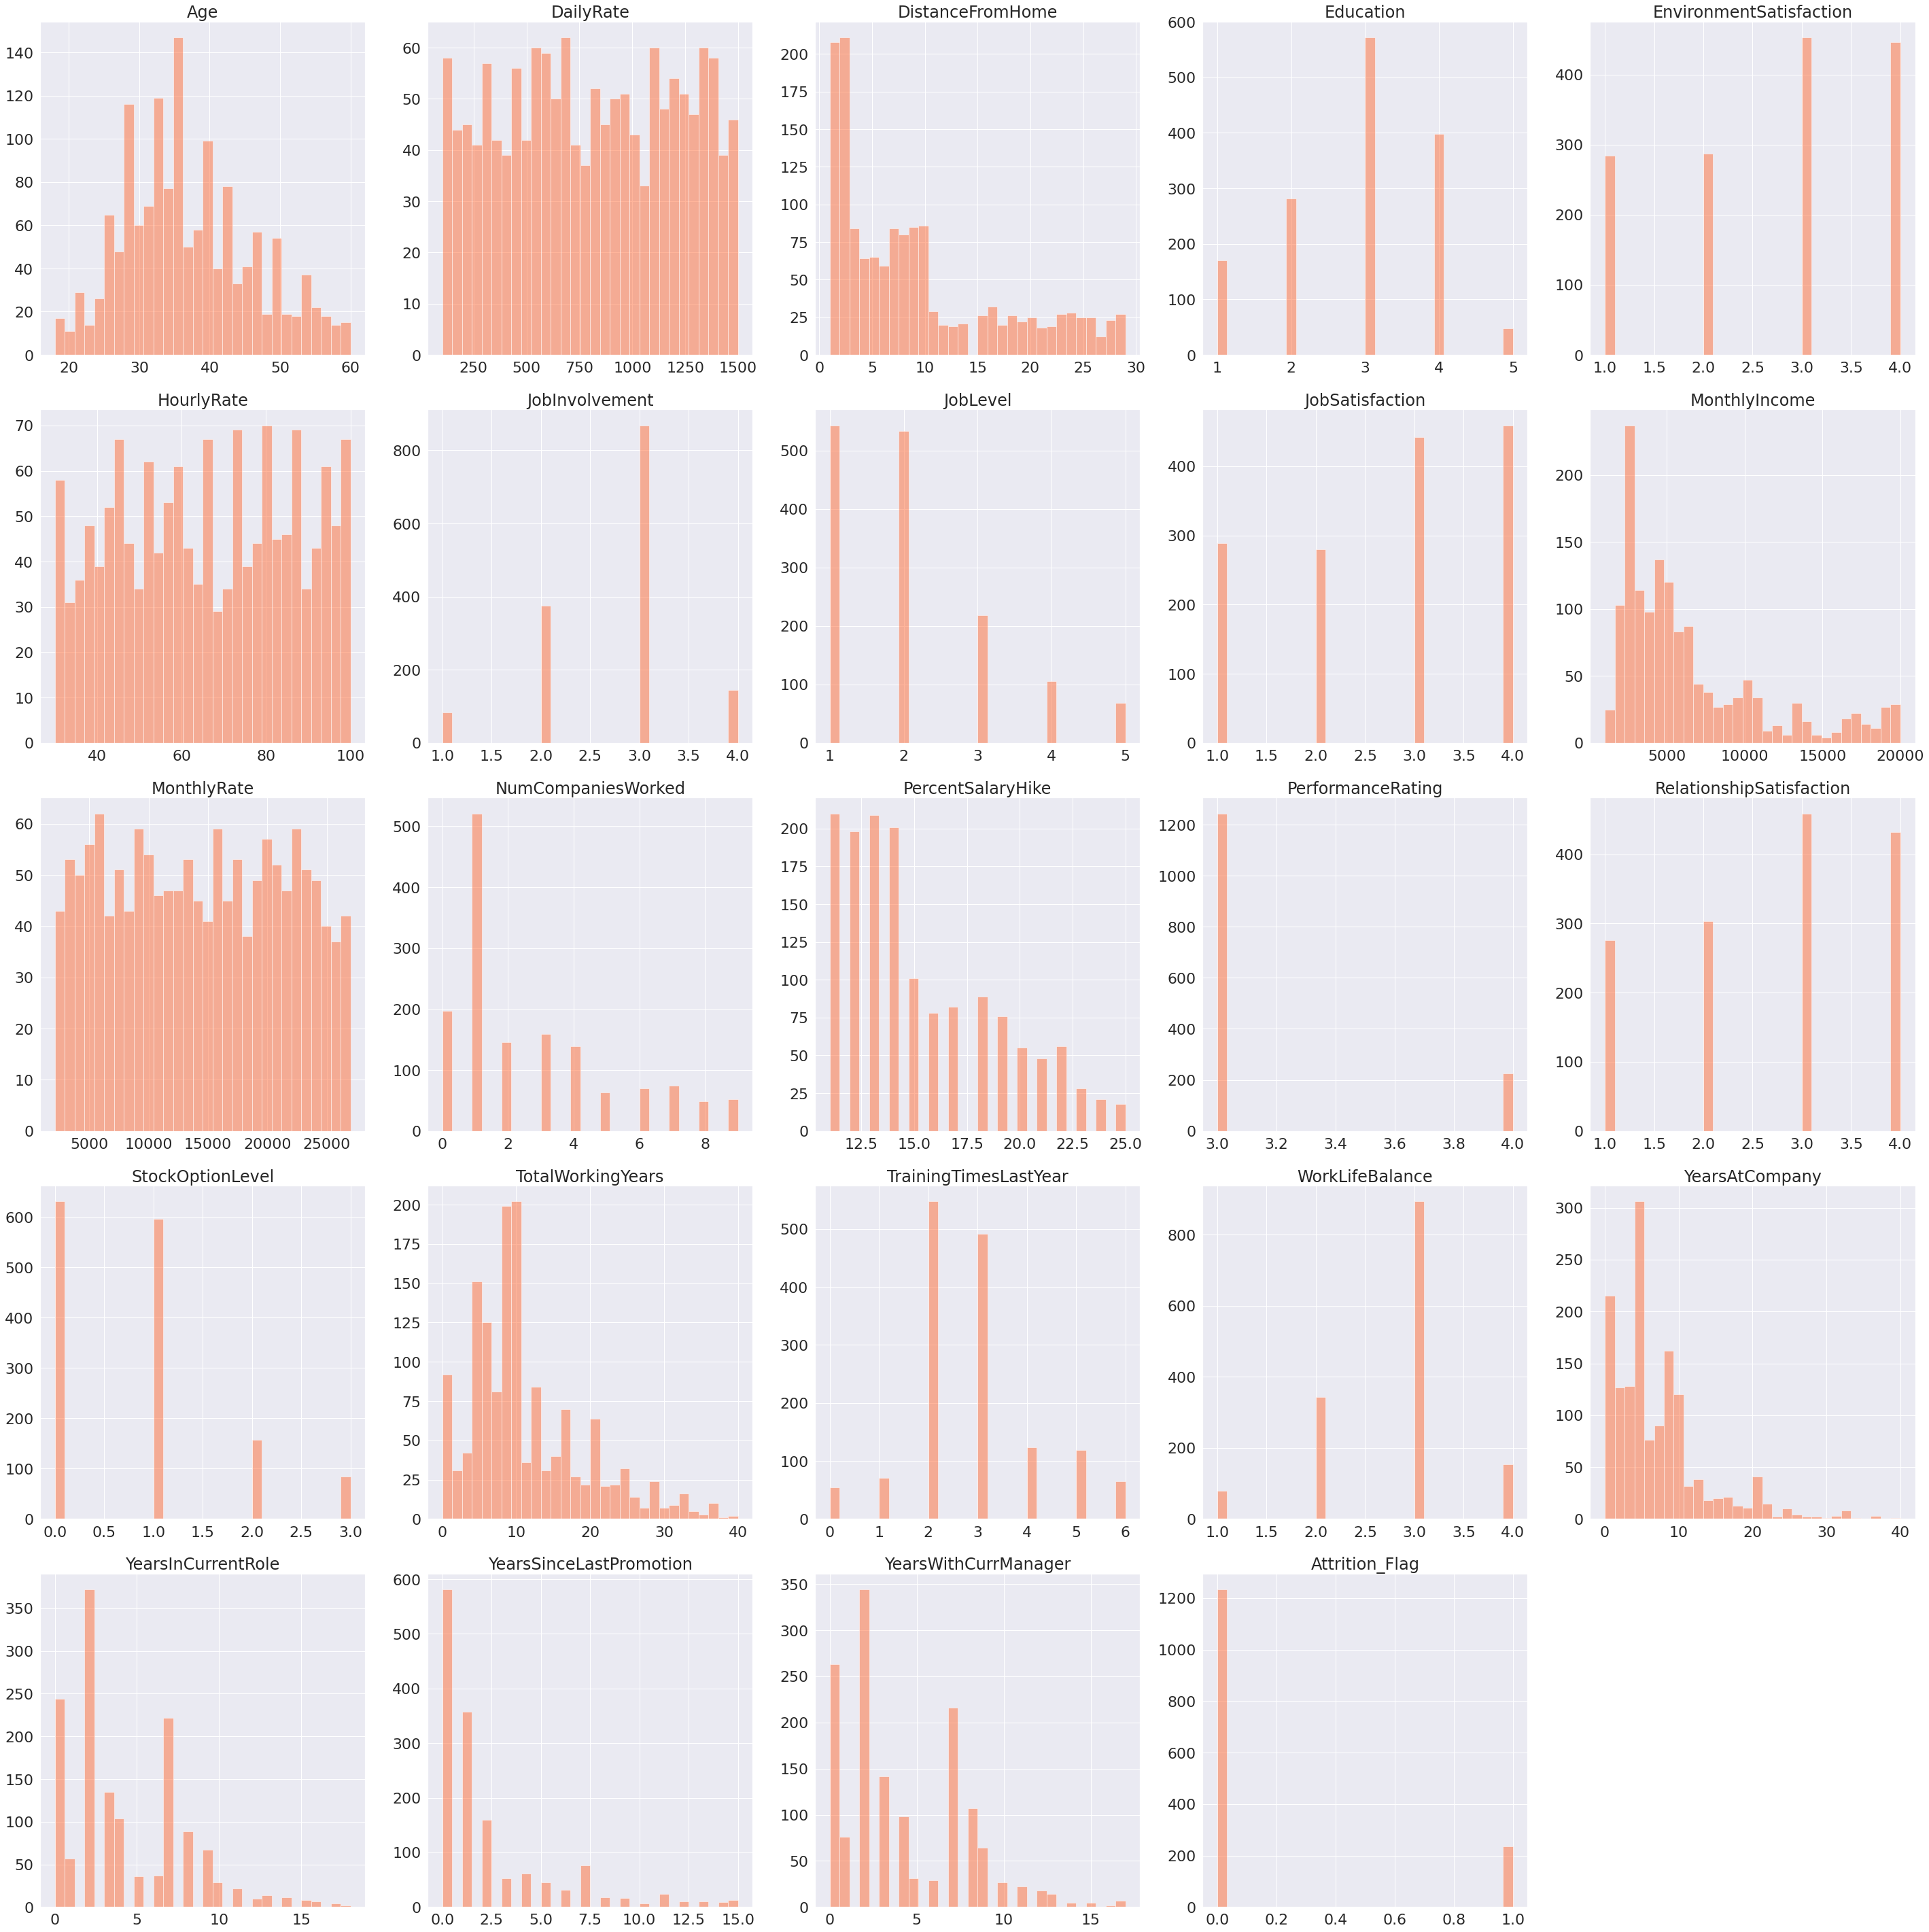

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
my_palette = sns.color_palette('rainbow')

# Set font size
sns.set(font_scale=2)

# Convert to Pandas for plotting
pdf = df.toPandas()

# Plot histogram
pdf.hist(bins=30, figsize=(40, 40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()


With Above histrograms we can infer that performance rating, years in current role, years at company and years since last promotion is right skewed, suggests thay small group of high performers or employees who have not been promoted for a long time and could signal a need to focus on career progression for employees in the long tail.

In [0]:
from pyspark.sql.types import StringType
from pyspark.sql import functions as F

# Step 1: Get string (categorical) columns
categorical_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]

# Step 2: Count unique values in each categorical column
print("Categorical columns and their unique value counts:\n")
for col in categorical_columns:
    unique_count = df.select(col).distinct().count()
    print(f"{col}: {unique_count} unique values")


Categorical columns and their unique value counts:

Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
OverTime: 2 unique values


In [0]:
from pyspark.sql.types import StringType
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Step 1: Identify categorical columns (string type)
categorical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]

# Step 2: Apply Label Encoding using StringIndexer
indexers = [
    StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid='keep')
    for col in categorical_cols
]

# Step 3: Fit and transform the data
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)

# Optional: Drop original columns and rename _indexed columns back to original names
for col in categorical_cols:
    df_indexed = df_indexed.drop(col).withColumnRenamed(col + "_indexed", col)

# Final DataFrame with label-encoded categorical columns
df = df_indexed
   

In [0]:
# Count each class in the Attrition column
df.groupBy('Attrition').count().show()


+---------+-----+
|Attrition|count|
+---------+-----+
|      0.0| 1233|
|      1.0|  237|
+---------+-----+



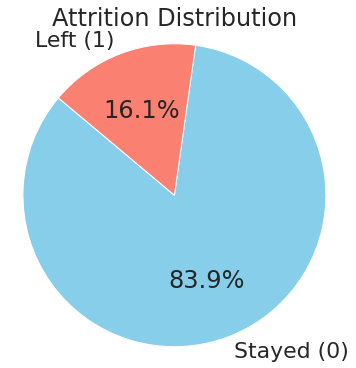

In [0]:
import matplotlib.pyplot as plt

# Sample counts from your output
counts = [1233, 237]
labels = ['Stayed (0)', 'Left (1)']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Attrition Distribution')
plt.axis('equal')
plt.show()


## Implementing Machine Learning Algorithms for Attrition Prediction

Lets see, how accurately can we we predict if an employee will stay or resign with these variables: 

In [0]:
%pip install imbalanced-learn mlflow xgboost scikit-learn


Python interpreter will be restarted.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a4de3455-b85c-4360-819b-b9341971a3d9
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Not uninstalling requests at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a4de3455-b85c-4360-819b-b9341971a3d9
    Can't uninstall 'requests'. No files were found to uninstall.
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a4de3455-b85c-4360-819b-b9341971a3d

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import mlflow.spark
import tempfile
import os

# -------------------------------------------------------
# Step 1: Load and preprocess the data
# -------------------------------------------------------
if not isinstance(df, pd.DataFrame):
    df = df.toPandas()

df = df.rename(columns={"Attrition": "label"})
feature_cols = [col for col in df.columns if col != "label"]
X = df[feature_cols]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]

# Resampling
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# -------------------------------------------------------
# Step 2: Define models
# -------------------------------------------------------
models = [
    ("Logistic Regression", "sklearn", LogisticRegression(max_iter=1000), (X_train, y_train), (X_test, y_test)),
    ("XGBoost", "sklearn", XGBClassifier(use_label_encoder=False, eval_metric="logloss"), (X_train, y_train), (X_test, y_test)),
    ("XGBoost SMOTETomek", "sklearn", XGBClassifier(use_label_encoder=False, eval_metric="logloss"), (X_resampled, y_resampled), (X_test, y_test))
]

# -------------------------------------------------------
# Step 3: Set MLflow Experiment
# -------------------------------------------------------
mlflow.set_experiment("/Users/skanodia@horizon.csueastbay.edu/Attrtion-Predction_V1")

# -------------------------------------------------------
# Step 4: Define and run model tracking
# -------------------------------------------------------
from sklearn.preprocessing import StandardScaler

def run_model(name, model_type, model_obj, train, test):
    print(f"\n▶️ Starting run for model: {name}")

    try:
        with mlflow.start_run(run_name=name):
            # === Flatten labels to ensure 1D ===
            y_train_flat = np.ravel(train[1])
            y_test_flat = np.ravel(test[1])

            # === Apply scaling only for Logistic Regression ===
            if "Logistic Regression" in name:
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(train[0])
                X_test_scaled = scaler.transform(test[0])

                model_obj.fit(X_train_scaled, y_train_flat)
                preds = model_obj.predict(X_test_scaled)
            else:
                model_obj.fit(train[0], y_train_flat)
                preds = model_obj.predict(test[0])

            # === Build prediction DataFrame ===
            predictions = pd.DataFrame({
                "label": y_test_flat.astype(int),
                "prediction": preds.astype(int)
            })

            # === Classification report ===
            report = classification_report(predictions["label"], predictions["prediction"], output_dict=True)

            # === Log model ===
            if "XGB" in name:
                mlflow.xgboost.log_model(model_obj, "model")
            else:
                mlflow.sklearn.log_model(model_obj, "model")

            # === Log parameters and metrics ===
            mlflow.log_param("model", name)
            mlflow.log_metric("accuracy", report.get("accuracy", 0))

            for label in ["0", "1"]:
                if label in report:
                    mlflow.log_metric(f"precision_class_{label}", report[label].get("precision", 0))
                    mlflow.log_metric(f"recall_class_{label}", report[label].get("recall", 0))
                    mlflow.log_metric(f"f1_class_{label}", report[label].get("f1-score", 0))
                else:
                    print(f"⚠️ Class {label} not found in predictions for model {name}")

            # === Confusion Matrix ===
            cm = confusion_matrix(predictions["label"], predictions["prediction"])
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
            plt.title(f"Confusion Matrix - {name}")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")

            temp_dir = tempfile.mkdtemp()
            cm_path = os.path.join(temp_dir, f"{name.replace(' ', '_')}_confusion_matrix.png")
            plt.savefig(cm_path)
            mlflow.log_artifact(cm_path)
            plt.close()

            print(f"✅ Completed and logged model: {name}")

    except Exception as e:
        print(f"❌ Error in run_model for {name}: {e}")

# -------------------------------------------------------
# Step 5: Run all models
# -------------------------------------------------------
for name, model_type, model_obj, train, test in models:
    run_model(name, model_type, model_obj, train, test)



---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-3312708633836889>:20
     15 import os
     17 # -------------------------------------------------------
     18 # Step 1: Load and preprocess the data
     19 # -------------------------------------------------------
---> 20 if not isinstance(df, pd.DataFrame):
     21     df = df.toPandas()
     23 df = df.rename(columns={"Attrition": "label"})

NameError: name 'df' is not defined

In [0]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")




Integrated MLflow to automatically track and compare the performance of three classification models:

Logistic Regression
Random Forest
XGBoost

**For each model:**

- Logged hyperparameters

- Tracked evaluation metrics: accuracy, precision, recall, and F1-score

- Saved the trained model along with its input schema and example

- Generated and logged visual artifacts: Confusion Matrix, ROC Curve, and Precision-Recall Curve  

In [0]:
print("label" in feature_cols)  # Should be False

# Combine back into DataFrames with unique row hashes
train_df = pd.DataFrame(X_train).assign(label=y_train)
test_df = pd.DataFrame(X_test).assign(label=y_test)

# Create hash column to identify unique rows
train_df["_row_hash"] = train_df.apply(lambda row: hash(tuple(row)), axis=1)
test_df["_row_hash"] = test_df.apply(lambda row: hash(tuple(row)), axis=1)

# Check for overlap
overlap_count = len(set(train_df["_row_hash"]).intersection(set(test_df["_row_hash"])))
print(f"❌ Overlapping rows: {overlap_count}")

from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)
pd.Series(importances, index=X.columns).sort_values(ascending=False)






| Model               | Accuracy | Recall (class 1) | F1 (class 1) | Notes                                   |
| ------------------- | -------- | ---------------- | ------------ | --------------------------------------- |
| Logistic Regression | 0.847    | 0.13             | 0.23         | High precision, but very low recall     |
| Random Forest       | 0.839    | 0.13             | 0.22         | Slightly worse than Logistic Regression |
| XGBoost             | 0.823    | 0.28             | 0.34         | Best balance of precision & recall      |



In [0]:

%pip install --upgrade numpy


Used SHAP to interpret model predictions and understand what drives attrition. 

Years in current role and monthly income was the most impactful feature — employees with frequent overtime are much more likely to leave. Other top drivers included Job Level, JobRole, and over time

Interestingly, low income and limited stock options increased the risk of attrition, while higher values of WorkLifeBalance, RelationshipSatisfaction, and YearsWithCurrManager reduced it. 



### 1.Variance Inflation factor

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 3: Calculate Variance Inflation Factor (VIF)
# VIF Calculation requires only numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Add a constant column for VIF calculation
numerical_df = numerical_df.assign(constant=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]

# Drop the constant column's VIF result
vif_data = vif_data[vif_data['Feature'] != 'constant']

print("\nVariance Inflation Factor (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False)) 

In [0]:
# Step 2: Identify High Correlations
# Threshold for multicollinearity (e.g., absolute correlation > 0.8)
threshold = 0.8
high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

print("Highly Correlated Features (Correlation > 0.8):")
print(high_correlation_pairs.dropna(how='all').dropna(axis=1, how='all'))


In [0]:
# Drop a specific column, e.g., 'JobLevel'
df = df.drop(columns=['JobLevel'])

# Verify the column is removed
print("Updated DataFrame columns:")
print(df.columns) 

Monthly income and total working years are powerful factor which leads to attrition, as an strategy to retain talent so we should revise compensation strategies and learning and developement opportunities for people with more years of experience.  

### Conclusion:

Based on our analysis of the Employee Attrition & Performance dataset, we can draw the following conclusions:

- The (Random Forest Model + SMOTE) performs best job in correctly identify roughly 42% of employees who will leave (recall) with 33% precision.

- Factors such as years at organisation, monthly income, and total working years were found to be important predictors of employee attrition.

- The company can use the model to identify employees who are at high risk of leaving and take proactive measures to retain them.

**Some more Insights:**

- *Labrotatory Technician, Research Scientist and Sales executives are the employee one who have been with organisation since 3-4 years and have had no promotions, indicating that Sales Department needs development in terms of Promotions, salary increment and on Job training.**

- *Performance Rating and Years Since Last Promotion is right skewed, suggests thay small group of high performers or employees who have not been promoted for a long time and could signal a need to focus on career progression for employees in the long tail.*

- *Moreover, Managers and Research directors have had no promotions since 3 years, while such levels takes time for employees to get promoted, suggestion is to run surveys for employees who are at manager and director levels to find their satisfaction level in terms of Job and career progression.*  


**Strategies and Recommendation:** 
                   
- Possible strategies for  include offering competitive compensation and benefits packages, providing opportunities for career growth and development, and fostering a positive work environment.

- Overall, our analysis highlights the importance of leveraging HR analytics to gain insights into workforce trends and patterns, and ultimately to make strategic decisions that can improve employee retention and reduce the costs associated with employee turnover. 